Plot and overview figure that demonstrates the sourmashconsumr functionality.

In [1]:
library(readr)
library(dplyr)
library(tidyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
setwd("..")

In [5]:
# use Arcadia brand font if present
if(file.exists("inputs/SuisseIntl-Regular.otf")){
  library(showtext)
  font_add("SuisseIntl", 
           regular = "inputs/SuisseIntl-Regular.otf",
           bold = "inputs/SuisseIntl-Bold.otf", 
           italic = "inputs/SuisseIntl-RegularItalic.otf")
  showtext::showtext_auto()
  theme_arcadia <- theme_classic() +
    theme(text = element_text(family = "SuisseIntl"))
} else {
  theme_arcadia <- theme_classic()
}

In [6]:
overview <- read_csv("overview.csv", show_col_types = F) %>%
  mutate(class = stringr::str_to_title(class),
         func = stringr::str_to_sentence(func)) %>%
  mutate(class = gsub("Read & Parse", "Read &\nParse", class)) %>%
  mutate(class = factor(class, levels = c("Read &\nParse", "Plot", "Analyze", "Convert")),
         func = factor(func, levels = c("Read", "Upset", "Heatmap", "Bar", "Sankey", "Time series alluvial", 
                                        "Sequencing depth rarefaction", "Multidimensional scaling",  
                                        "Detect multiple strains", "To metacoder", "To phyloseq")))

In [38]:
# adjust plot size rendered inline
options(repr.plot.width = 6.25, repr.plot.height = 4, repr.plot.res = 300)

plt <- ggplot(overview, aes(x = func, y = sourmash, fill= value)) + 
  geom_tile() +
  geom_point(shape = "\u2714", size = 5) +
  scale_fill_gradient(low="white", high = "white") + # high="#8F8885") +
  facet_grid(~class, scales = "free", space = "free_x") +
  theme_arcadia +
  theme(axis.text.x = element_text(angle = 45, vjust = .99, hjust = .95), # change angle of x axis text
        axis.title.y = element_text(angle = 0, vjust = .5, size = 13), 
        axis.title.x = element_text(size = 13), 
        plot.title = element_text(size = 13, hjust = 0.5),
        axis.line = element_blank(), # remove axis lines
        strip.background = element_blank(), # remove strip outline 
        strip.text.x = element_text(face = "bold", color = "#F28360"), 
        strip.placement = "outside",
        legend.position = "none") + 
  annotate("segment",x=Inf,xend=-Inf,y=Inf,yend=Inf, color="black", linewidth=1) + # underline facet labels
  labs(x = "sourmashconsumr functionality",
       y = "Output from\nsourmash",
       title = "Functionality") +
  scale_y_discrete(limits = rev(c("sketch", "compare", "gather", "taxonomy")))


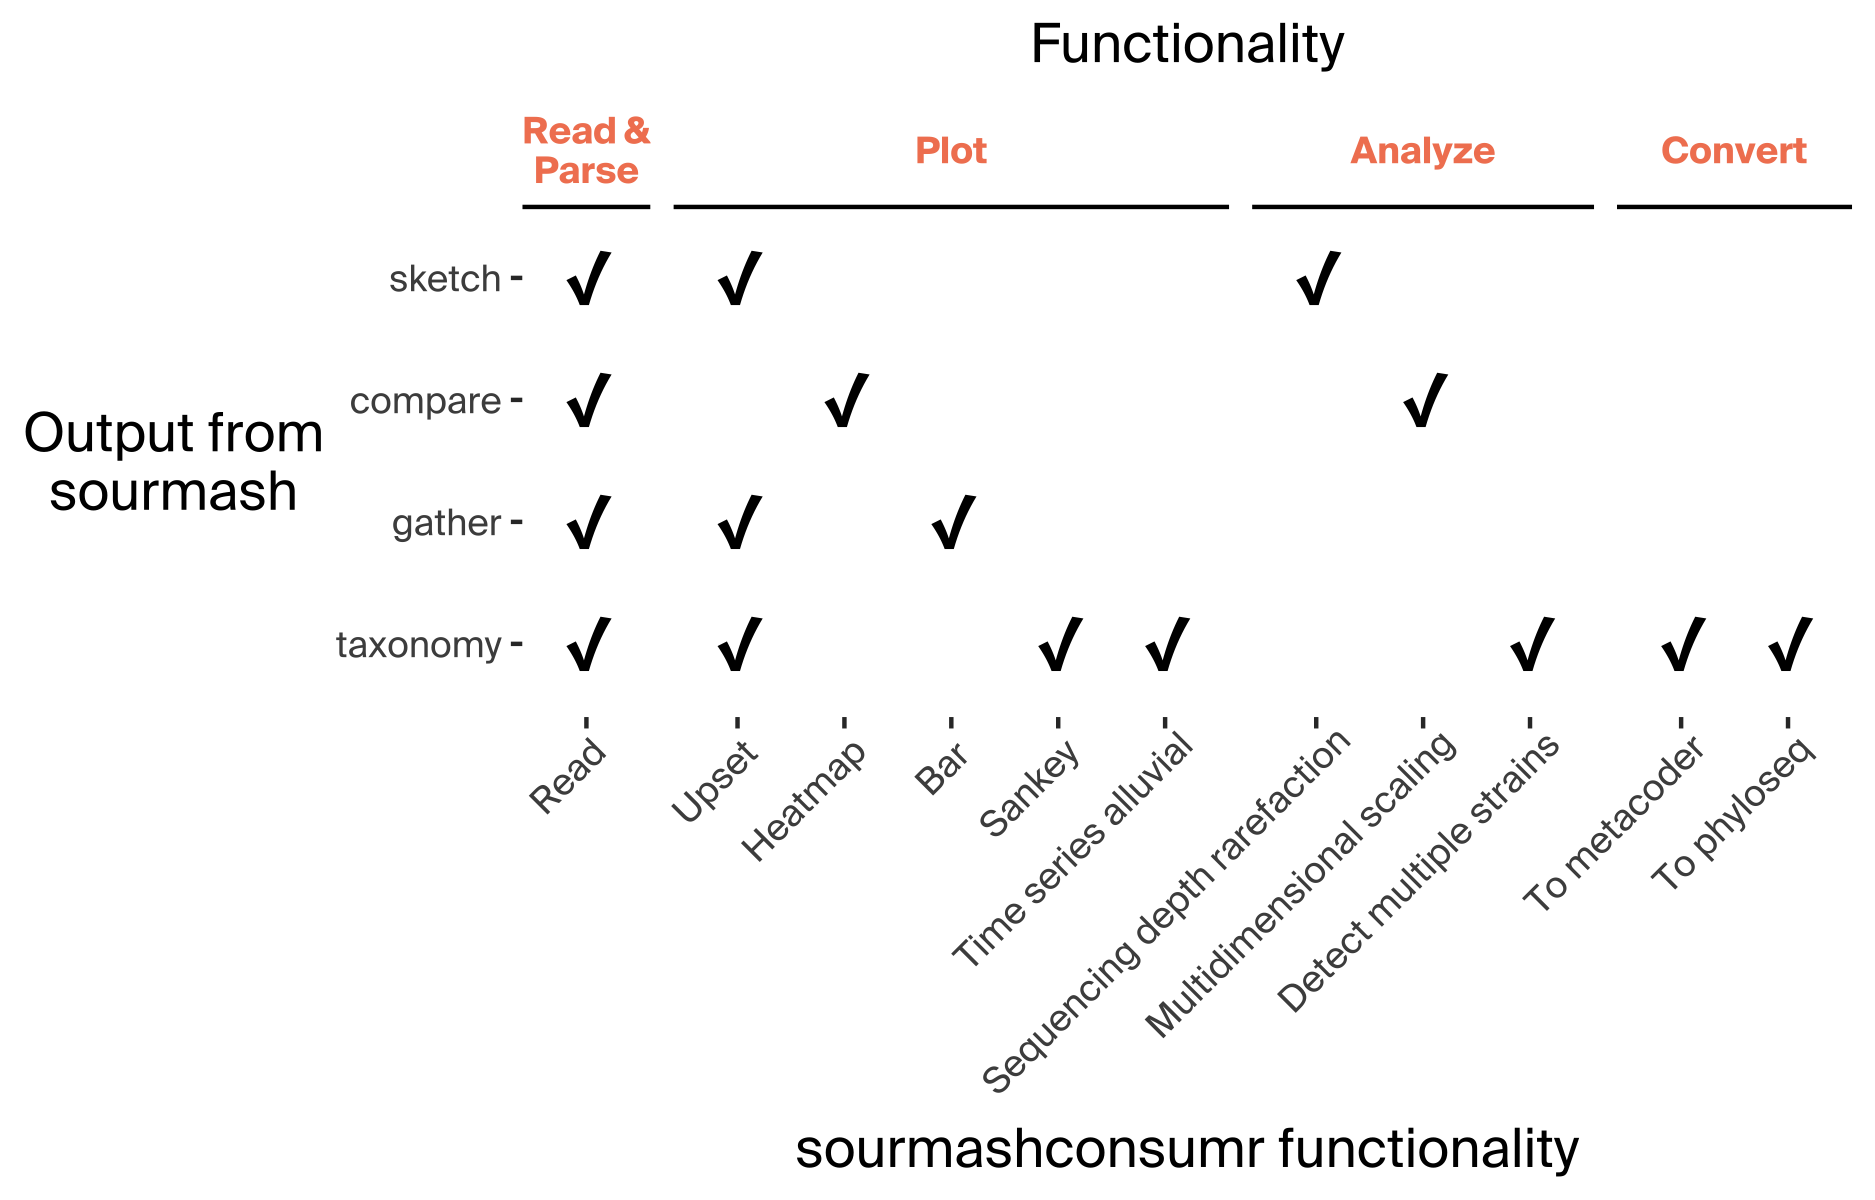

In [39]:
plt

In [40]:
pdf("figures/fig1_overview.pdf", width = 5.9, height = 4)
plt
dev.off()
png("figures/fig1_overview.png", width = 5.9, height = 4, units = "in", res = 300)
plt
dev.off()
svg("figures/fig1_overview.svg", width = 5.9, height = 4)
plt
dev.off()

pdf 
  2

pdf 
  2

pdf 
  2